In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, Callback
from tensorflow.keras.regularizers import l2
import tensorflow as tf
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Read the dataset
stroke = pd.read_csv("/content/diabetes_binary_health_indicators_BRFSS2015.csv")

# Preprocess the data
X = stroke.drop('Diabetes_binary', axis=1)
y = stroke['Diabetes_binary']

# Encoding Categorical Data with One-Hot Encoding
df_onehot = pd.get_dummies(stroke).astype(int)

# Separate df_onehot to be X and y
X = df_onehot.drop(columns=['Diabetes_binary'])  # Features
y = df_onehot['Diabetes_binary']  # Target variable

scaler=StandardScaler()

X=scaler.fit_transform(X)


In [ ]:
df_onehot

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0,1,1,1,45,0,0,0,0,1,...,1,0,3,0,5,0,1,5,6,7
253676,1,1,1,1,18,0,0,0,0,0,...,1,0,4,0,0,1,0,11,2,4
253677,0,0,0,1,28,0,0,0,1,1,...,1,0,1,0,0,0,0,2,5,2
253678,0,1,0,1,23,0,0,0,0,1,...,1,0,3,0,0,0,1,7,5,1


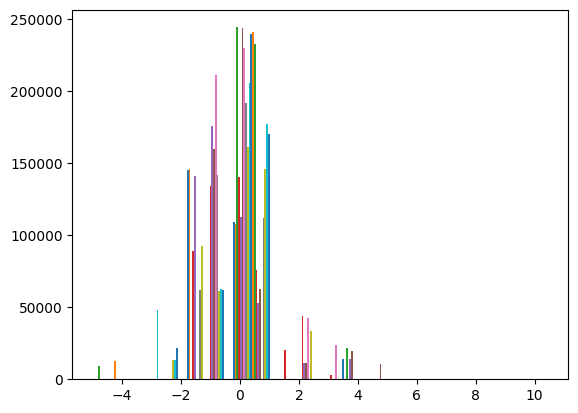

In [2]:
plt.hist(X)
plt.show()

In [3]:
from imblearn.over_sampling import SMOTE
#from sklearn.feature_selection import SelectKBest, f_classif

# Misalkan df adalah DataFrame asli
# X adalah fitur dalam bentuk ndarray dan y adalah target
#feature_names = stroke.columns.drop('Diabetes_binary')  # Menyimpan nama kolom fitur sebelum menjadi ndarray

# Apply SMOTE to handle imbalanced data
smote = SMOTE()
xtrain, ytrain = smote.fit_resample(X, y)

# Select the best 18 features
#selector = SelectKBest(score_func=f_classif, k=18)
#xtrain = selector.fit_transform(xtrain, ytrain)

# Get the mask of selected features
#selected_mask = selector.get_support()

# Get the names of the selected features
#selected_features = feature_names[selected_mask]

# Display the selected features
#print("Selected Features:")
#print(selected_features)



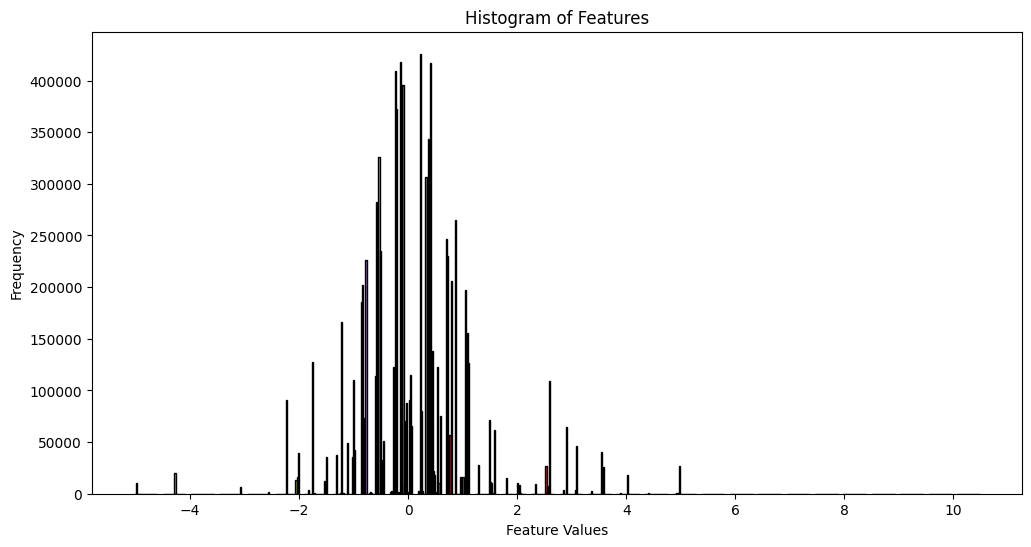

In [4]:
# Plot histogram for the selected features
plt.figure(figsize=(12, 6))
plt.hist(xtrain, bins=30, edgecolor='k')
plt.title("Histogram of Features")
plt.xlabel("Feature Values")
plt.ylabel("Frequency")
plt.show()

In [5]:
# Split the data for train and test
X_train, X_test, y_train, y_test = train_test_split(xtrain,ytrain,test_size=0.2,shuffle=True,stratify=ytrain, random_state=123)

# Feature selection with RFE using RandomForestClassifier
#rf = RandomForestClassifier(n_estimators=100, random_state=123)
#rfe = RFE(rf, n_features_to_select=7)
#X_train_rfe = rfe.fit_transform(X_train, y_train)
#X_test_rfe = rfe.transform(X_test)

# Selected features
#selected_features = X_train.columns[rfe.support_]
#print("Selected features:", selected_features)



In [6]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))
print(len(X))
print(len(y))

print(len(X_train)+len(X_test))

349334
349334
87334
87334
253680
253680
436668


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               11264     
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 16)                528       
                                                                 
 dropout (Dropout)           (None, 16)                0

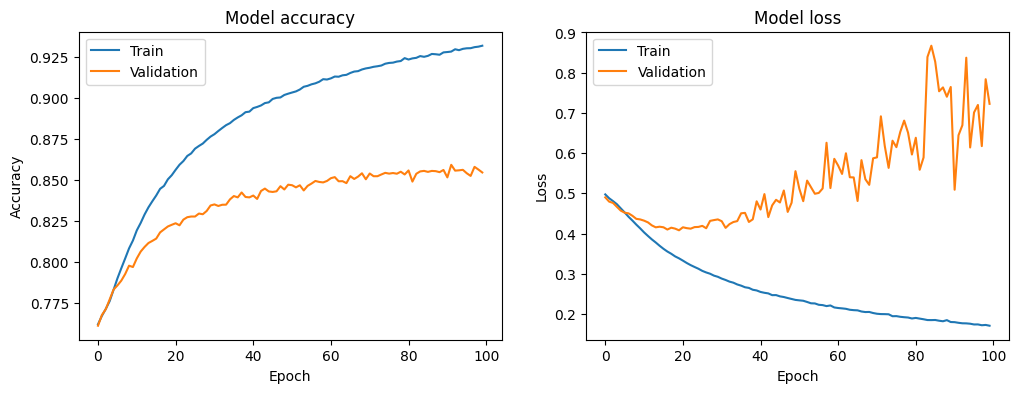

2730/2730 [==============================] - 7s 2ms/step


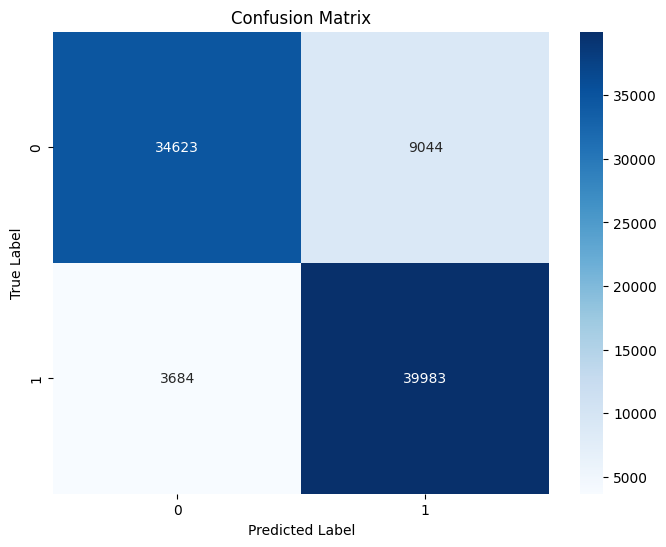

In [7]:
# Define a custom callback to stop training when accuracy exceeds 90%
class StopTrainingCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get('val_accuracy') > 0.9:
            print(f"\nAccuracy has reached {logs.get('accuracy'):.2f}, stopping training!")
            self.model.stop_training = True

# Define the model with added regularization and dropout layers
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(512,input_dim = X_train.shape[1], activation = "relu"),
    tf.keras.layers.Dense(256,activation = "relu"),
    tf.keras.layers.Dense(128,activation = "relu"),
    tf.keras.layers.Dense(64,activation = "relu"),
    tf.keras.layers.Dense(32,activation = "relu"),
    tf.keras.layers.Dense(16,activation = "relu"),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])
model.summary()

# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model with the custom callback
stop_training_callback = StopTrainingCallback()

history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=32,
                    validation_split=0.2,
                    callbacks=[stop_training_callback],
                    verbose=1)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc}')

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

# Predict the values from the test dataset
y_pred = model.predict(X_test)
y_pred_classes = np.round(y_pred).astype(int)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [8]:
model.save("/content/Diabetes.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
X_train.shape[1]

NameError: name 'X_train' is not defined

In [ ]:
data_dummy = np.array([[45,42,00,00]])


In [ ]:
def classify_air(data):
  pred = np.argmax(model.predict(data))

  if pred == 0:
    label  = "No Diabetes"
  elif pred == 1:
    label  = "Diabetes"

  return label

In [ ]:
classify_air(data_dummy)